EDA With Algerian Fire Data


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing the dataset

In [8]:
df=pd.read_csv('/fire.csv',header=1)

In [9]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [11]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [21]:
df[df.isna().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [22]:
df.dropna()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire      

[244 rows x 14 columns]

In [23]:
df[df.isna().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [30]:
df=df.dropna()

In [46]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []

In [40]:
df.iloc[[123]]

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
123  02    06  2012          30  73  13     4  55.7  2.7  7.8  0.6  2.9  0.2   

       Classes    
123  not fire

In [33]:
df=df.drop(123).reset_index(drop=True)

In [41]:
df.iloc[[123]]

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
123  02    06  2012          30  73  13     4  55.7  2.7  7.8  0.6  2.9  0.2   

       Classes    
123  not fire

In [43]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [48]:
df.describe()

day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   243   243   243         243  243  243   243   243  243  243  243  243   
unique   31     4     1          19   62   18    39   173  165  197  106  173   
top      01    08  2012          35   64   14     0  88.9  7.9    8  1.1    3   
freq      8    62   243          29   10   43   133     7    5    5    8    5   

        FWI Classes    
count   243       243  
unique  126         8  
top     0.4   fire     
freq     12       131

In [49]:
df.loc[122:,'area']=1

In [50]:
df.loc[:122,'area']=0

In [51]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    area  
0  not fire      0.0  
1  not fire      0.0  
2  not fire      0.0  
3  not fire      0.0  
4  not fire      0.0

In [56]:
df_cat=[features for features in df.columns if df[features].dtype=='O']

In [57]:
df_cat

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ']

In [65]:
df_num=[features for features in df.columns if df[features].dtype!='O']

In [59]:
df_num

['area']

In [62]:
##Converting cat into float
for i in df.columns:
  if i!='Classes  ':
    df[i]=df[i].astype(float)



In [63]:
df_cat=[features for features in df.columns if df[features].dtype=='O']

In [64]:
df_cat

['Classes  ']

In [66]:
df_num

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'area']

In [69]:
df

day  month    year  Temperature    RH    Ws  Rain   FFMC   DMC    DC  \
0     1.0    6.0  2012.0         29.0  57.0  18.0    0.0  65.7   3.4   7.6   
1     2.0    6.0  2012.0         29.0  61.0  13.0    1.3  64.4   4.1   7.6   
2     3.0    6.0  2012.0         26.0  82.0  22.0   13.1  47.1   2.5   7.1   
3     4.0    6.0  2012.0         25.0  89.0  13.0    2.5  28.6   1.3   6.9   
4     5.0    6.0  2012.0         27.0  77.0  16.0    0.0  64.8   3.0  14.2   
..    ...    ...     ...          ...   ...   ...    ...   ...   ...   ...   
238  26.0    9.0  2012.0         30.0  65.0  14.0    0.0  85.4  16.0  44.5   
239  27.0    9.0  2012.0         28.0  87.0  15.0    4.4  41.1   6.5   8.0   
240  28.0    9.0  2012.0         27.0  87.0  29.0    0.5  45.9   3.5   7.9   
241  29.0    9.0  2012.0         24.0  54.0  18.0    0.1  79.7   4.3  15.2   
242  30.0    9.0  2012.0         24.0  64.0  15.0    0.2  67.3   3.8  16.5   

     ISI   BUI  FWI     Classes    area  
0    1.3   3.4  0.5   not fire      0.0  
1    1.0   3.9  0.4   not fire      0.0  
2    0.3   2.7  0.1   not fire      0.0  
3    0.0   1.7  0.0   not fire      0.0  
4    1.2   3.9  0.5   not fire      0.0  
..   ...   ...  ...           ...   ...  
238  4.5  16.9  6.5       fire      1.0  
239  0.1   6.2  0.0   not fire      1.0  
240  0.4   3.4  0.2   not fire      1.0  
241  1.7   5.1  0.7   not fire      1.0  
242  1.2   4.8  0.5  not fire       1.0  

[243 rows x 15 columns]

In [71]:
df_up_num=df[df_num]

<Axes: >

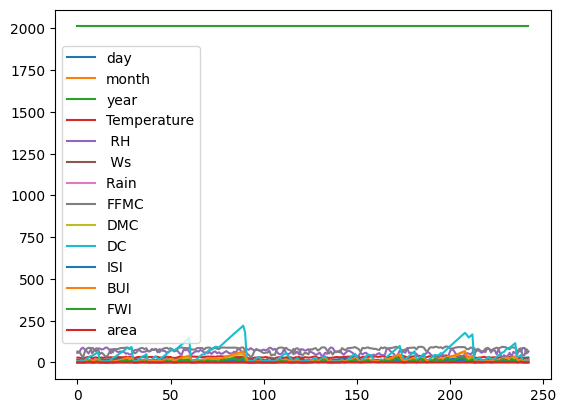

In [72]:
df_up_num.plot()

<Axes: >

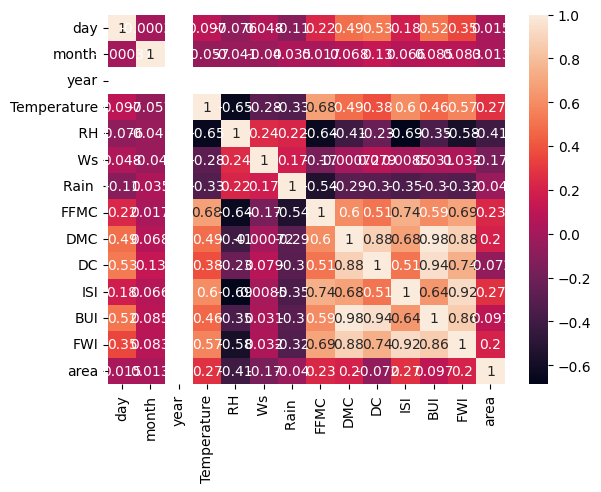

In [74]:
sns.heatmap(df_up_num.corr(),annot=True)

<Axes: >

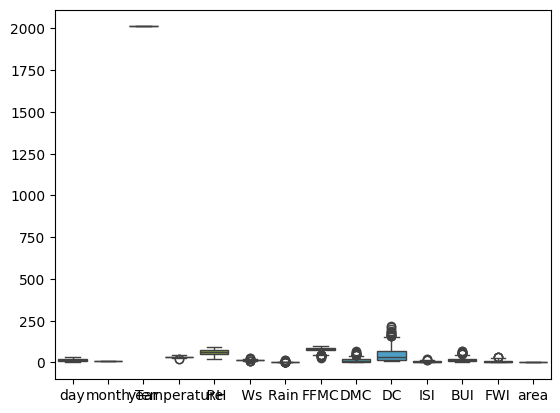

In [75]:
sns.boxplot(df_up_num)

<Axes: ylabel='Count'>

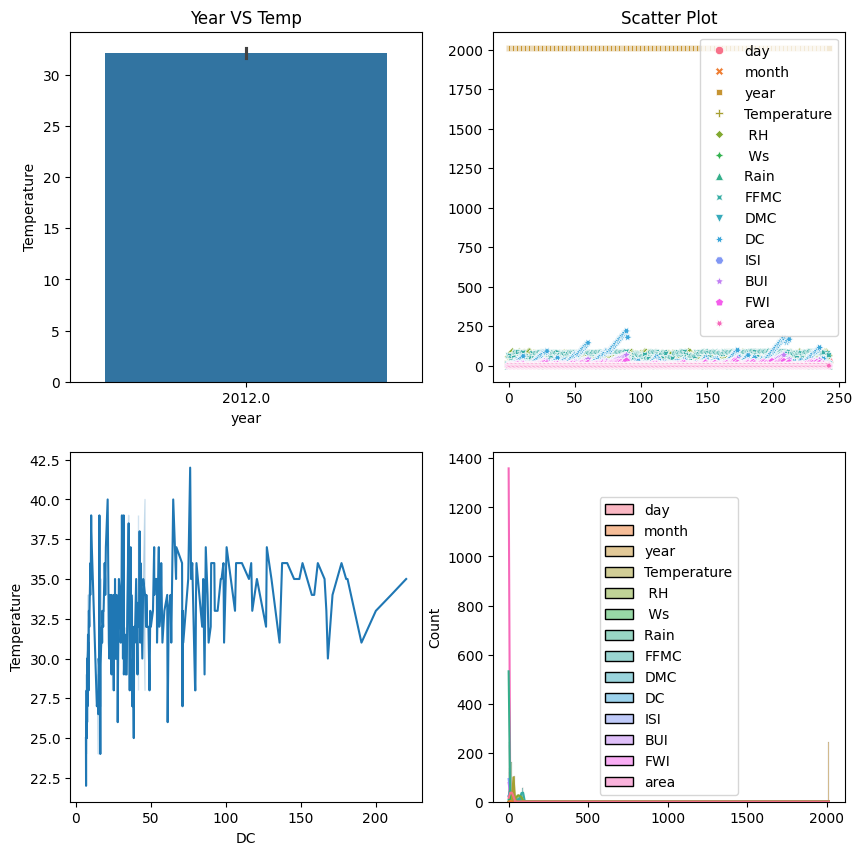

In [91]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
sns.barplot(df_up_num,x='year',y='Temperature',ax=axes[0,0])
axes[0,0].set_title('Year VS Temp')
sns.scatterplot(df_up_num,ax=axes[0,1])
axes[0,1].set_title('Scatter Plot')
sns.lineplot(df_up_num,x='DC',y='Temperature',ax=axes[1,0])
sns.histplot(df_up_num,kde=True,ax=axes[1,1])


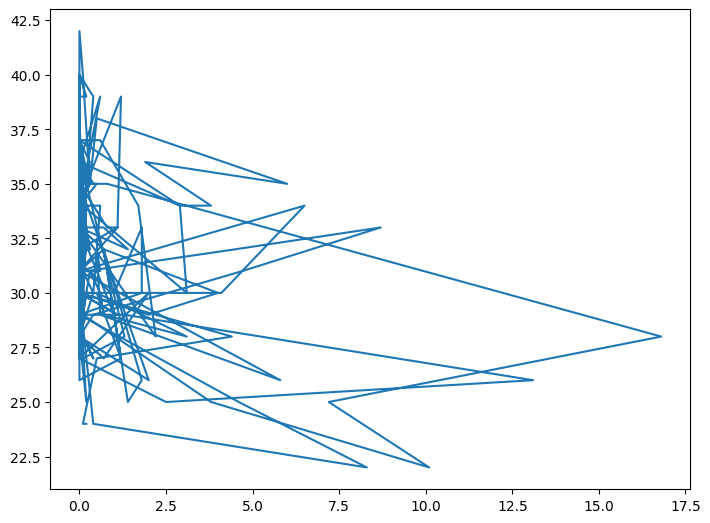

In [100]:
fig=plt.figure()
fig.add_axes([0,0,1,1])
plt.plot(df_up_num['Rain '],df_up_num['Temperature'])

In [106]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

In [107]:
AV=AutoViz_Class()

Shape of your Data Set loaded: (243, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    14 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['year']
To fix these data quality issues in the dataset, import Fix

Number of All Scatter Plots = 78


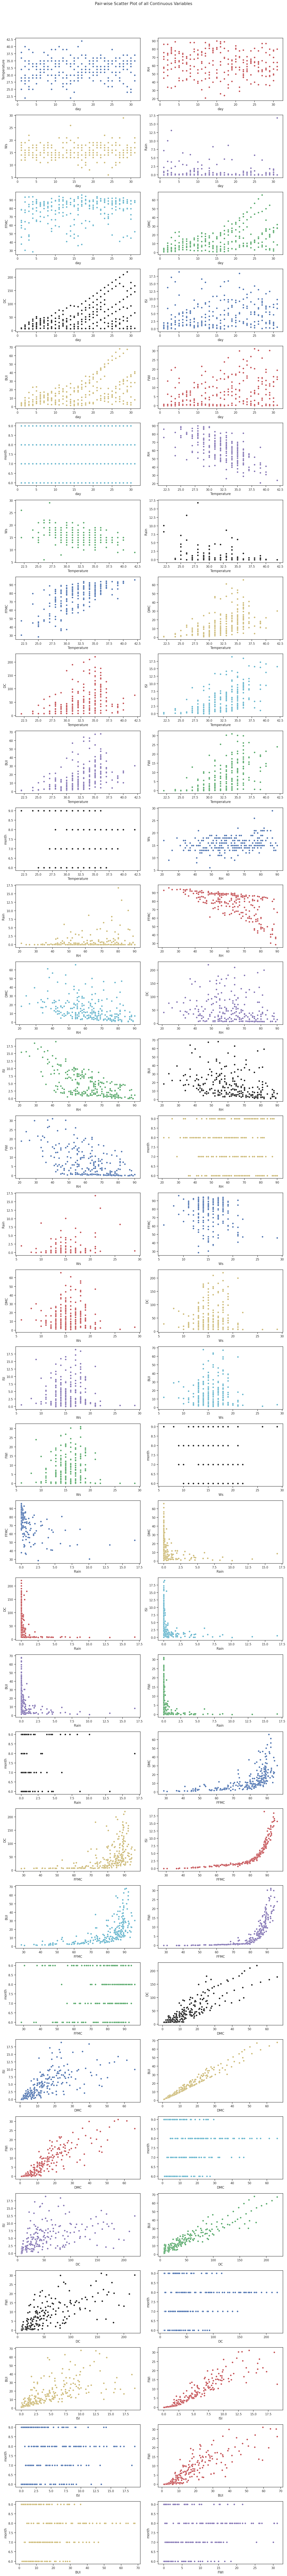

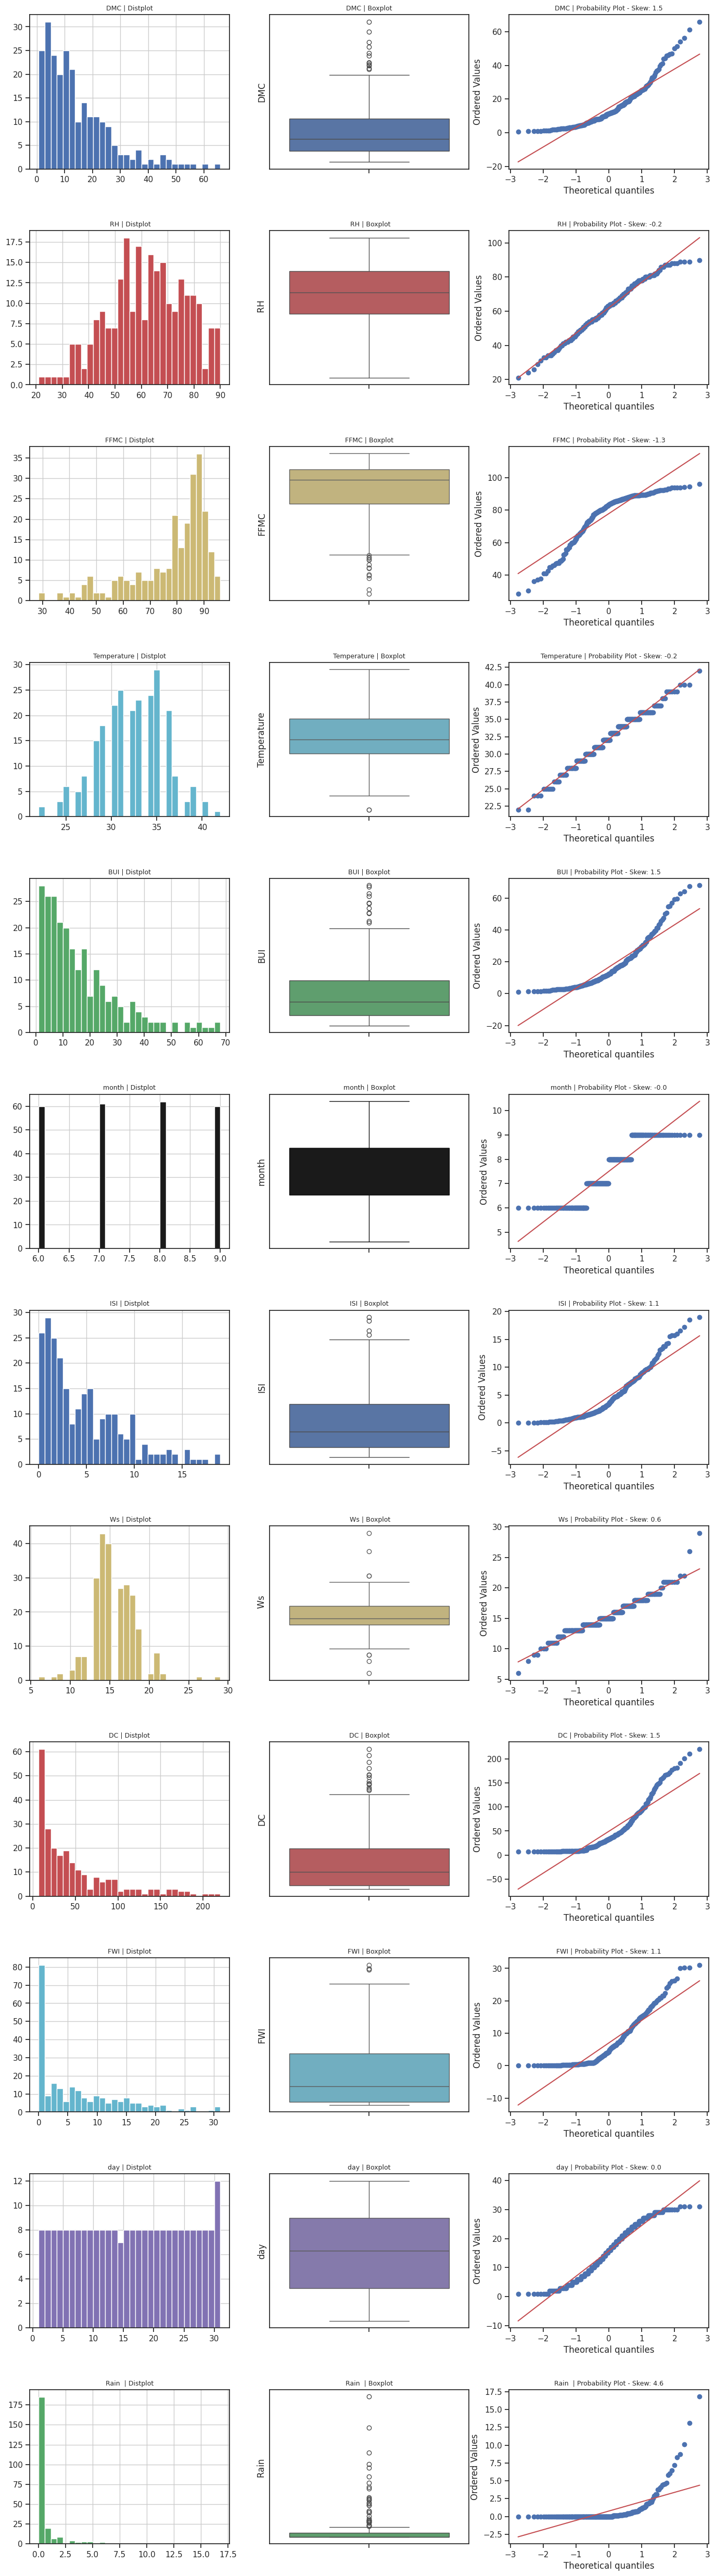

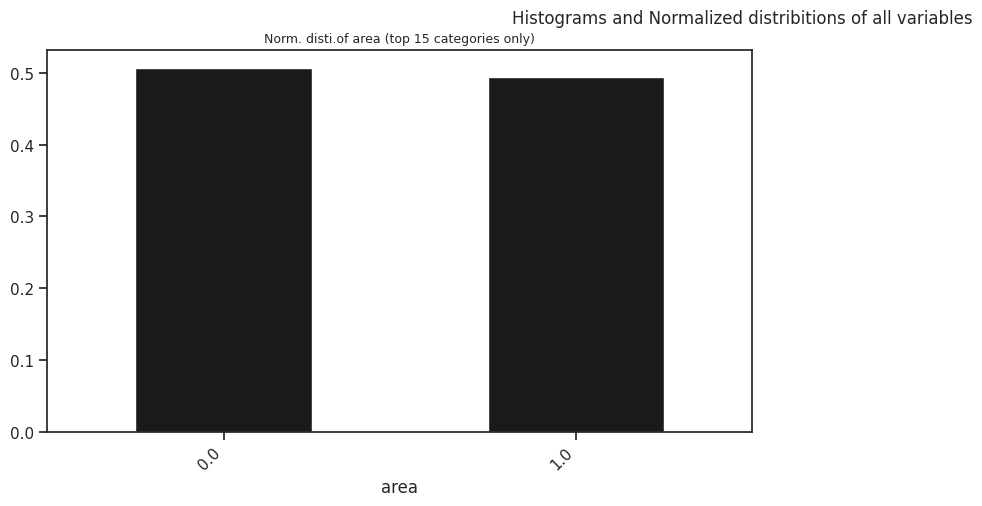

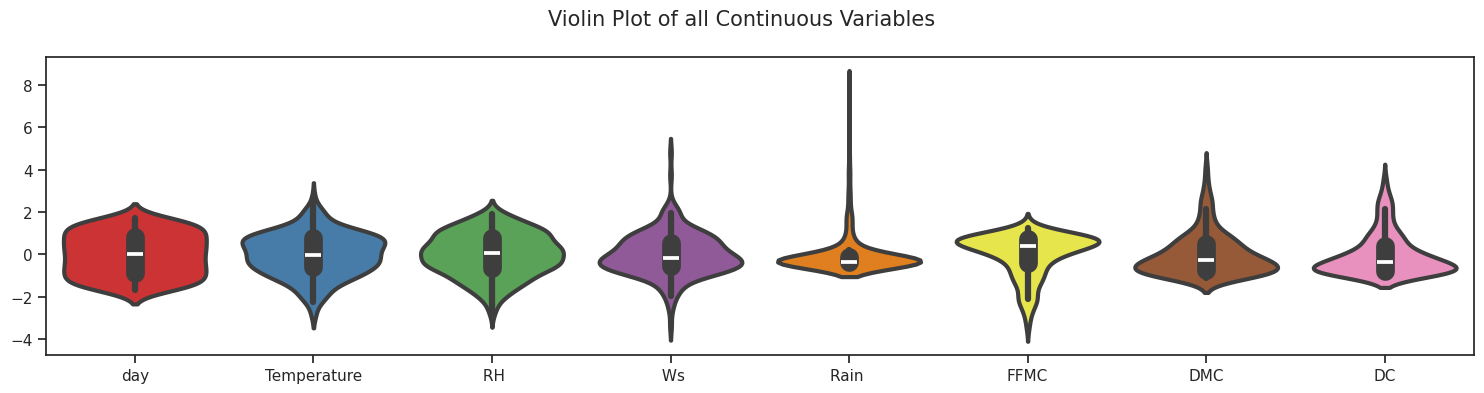

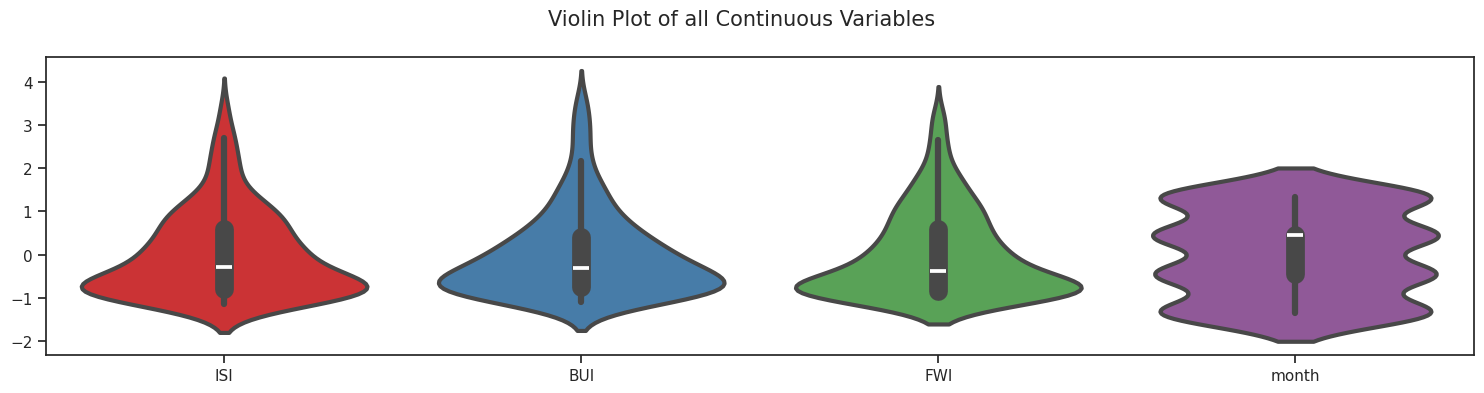

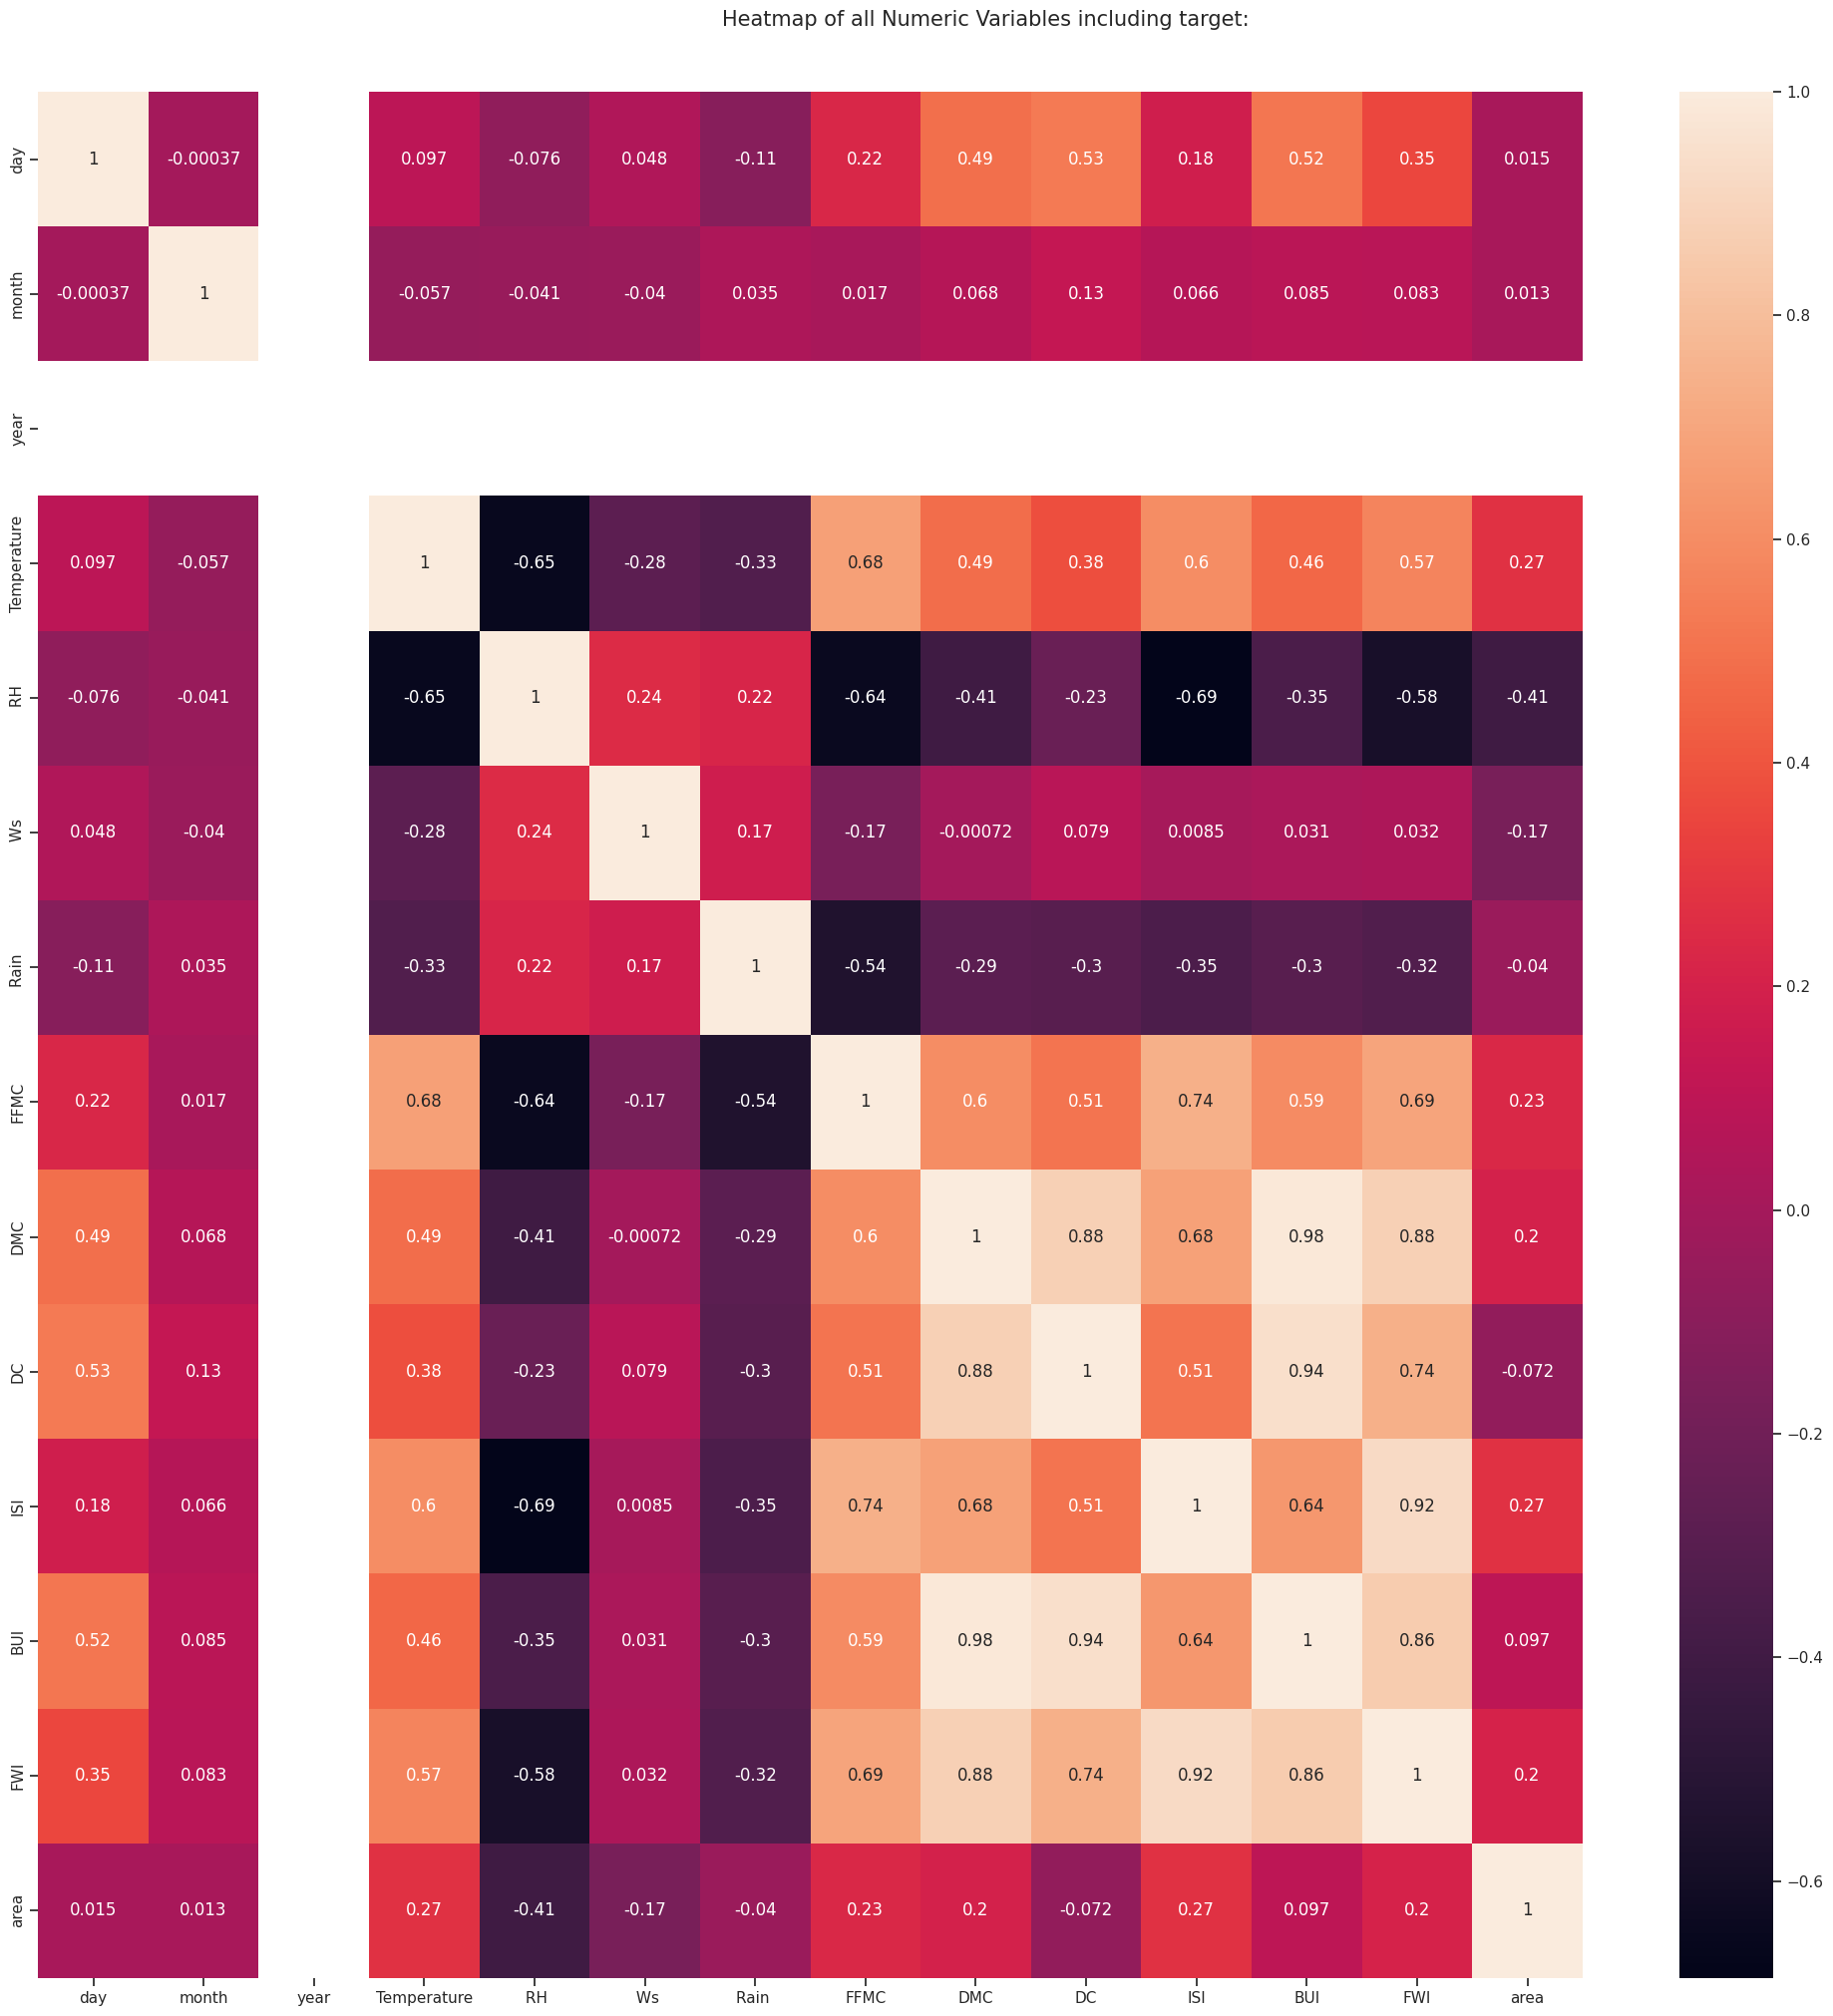

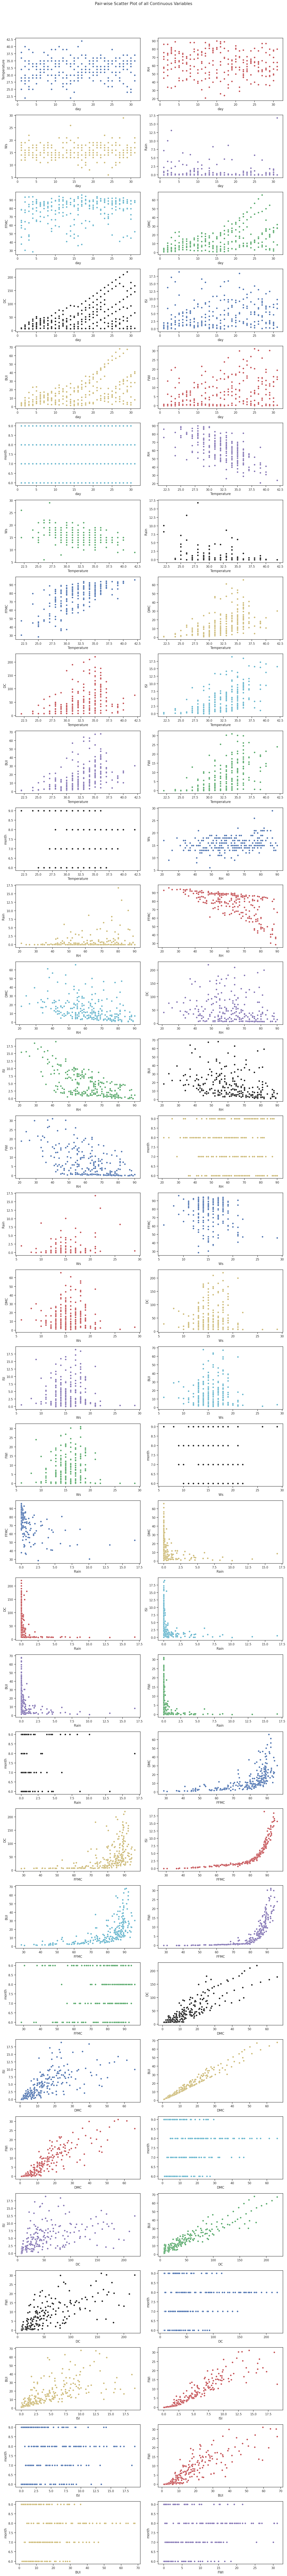

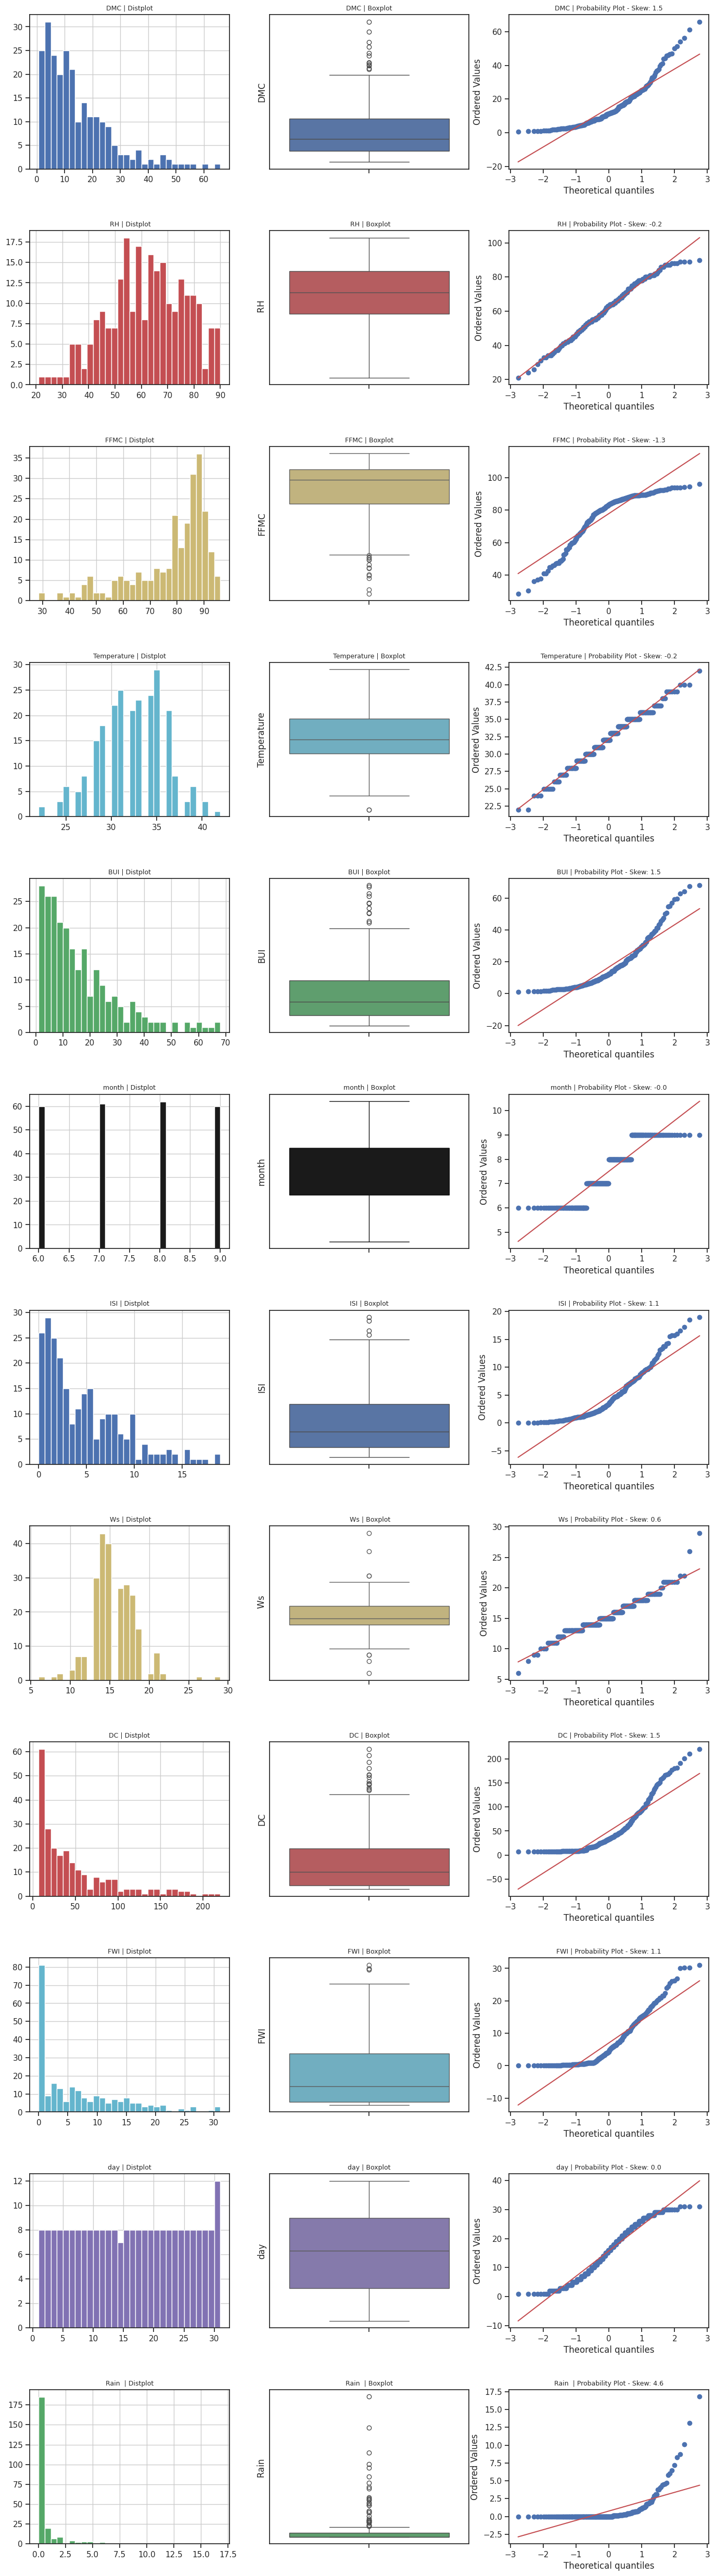

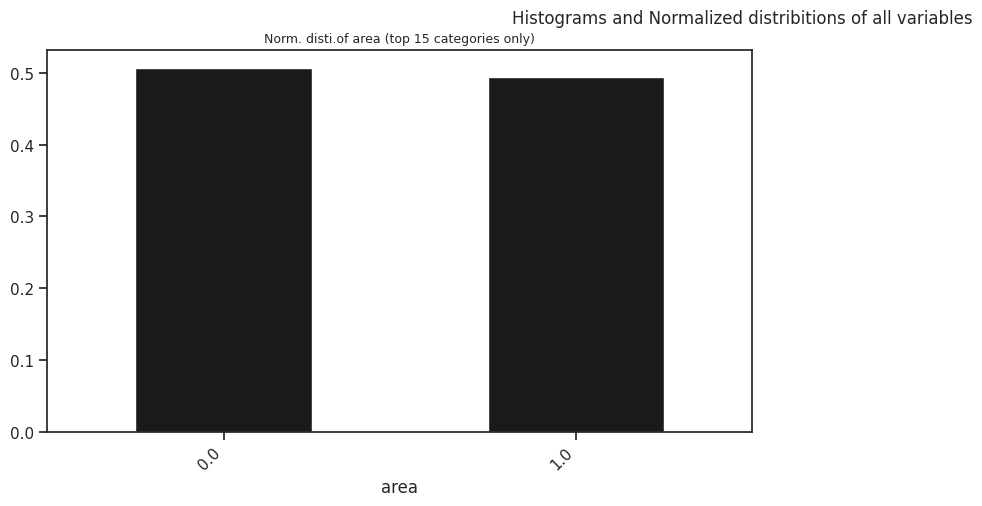

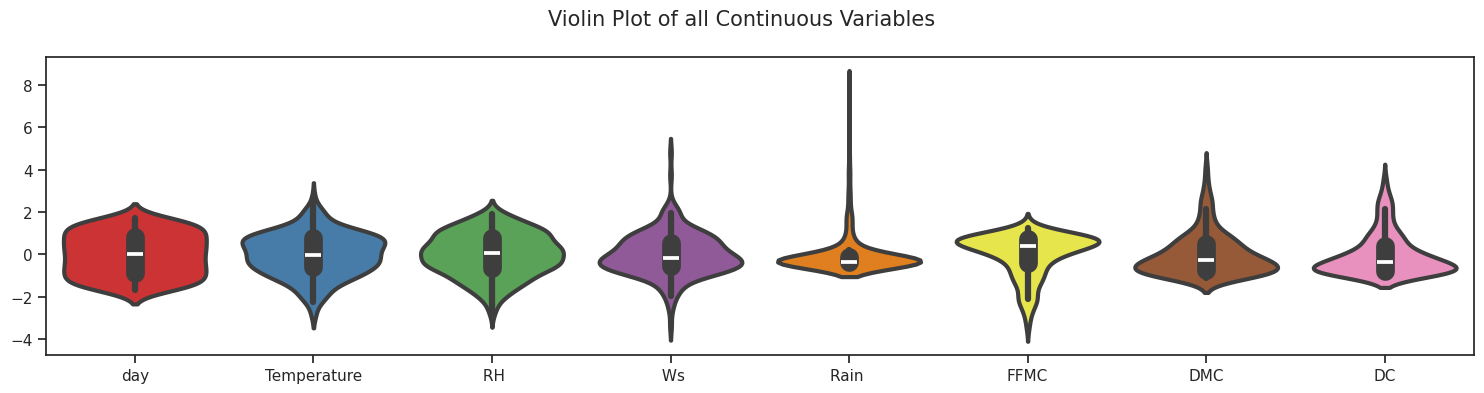

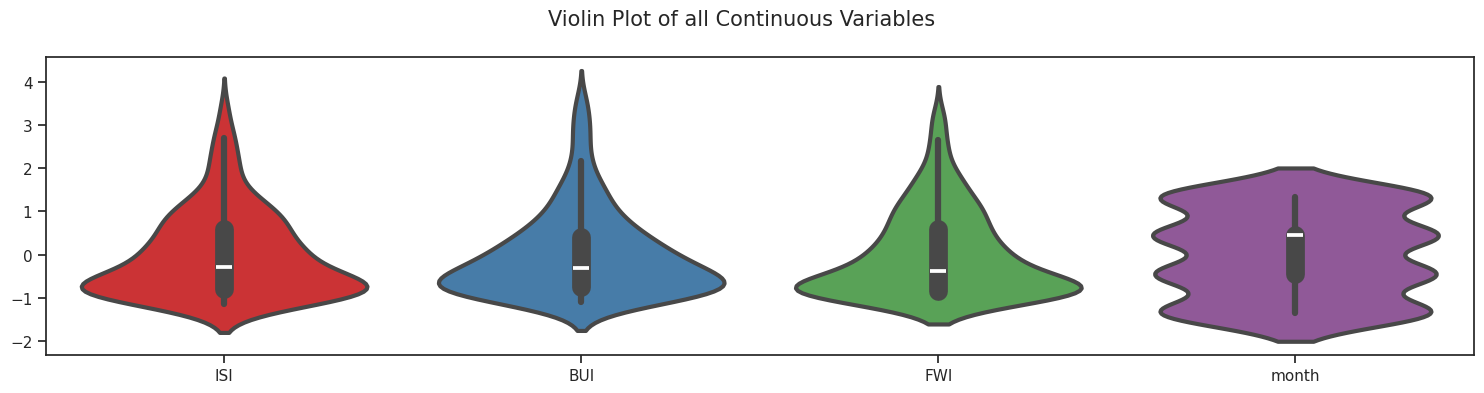

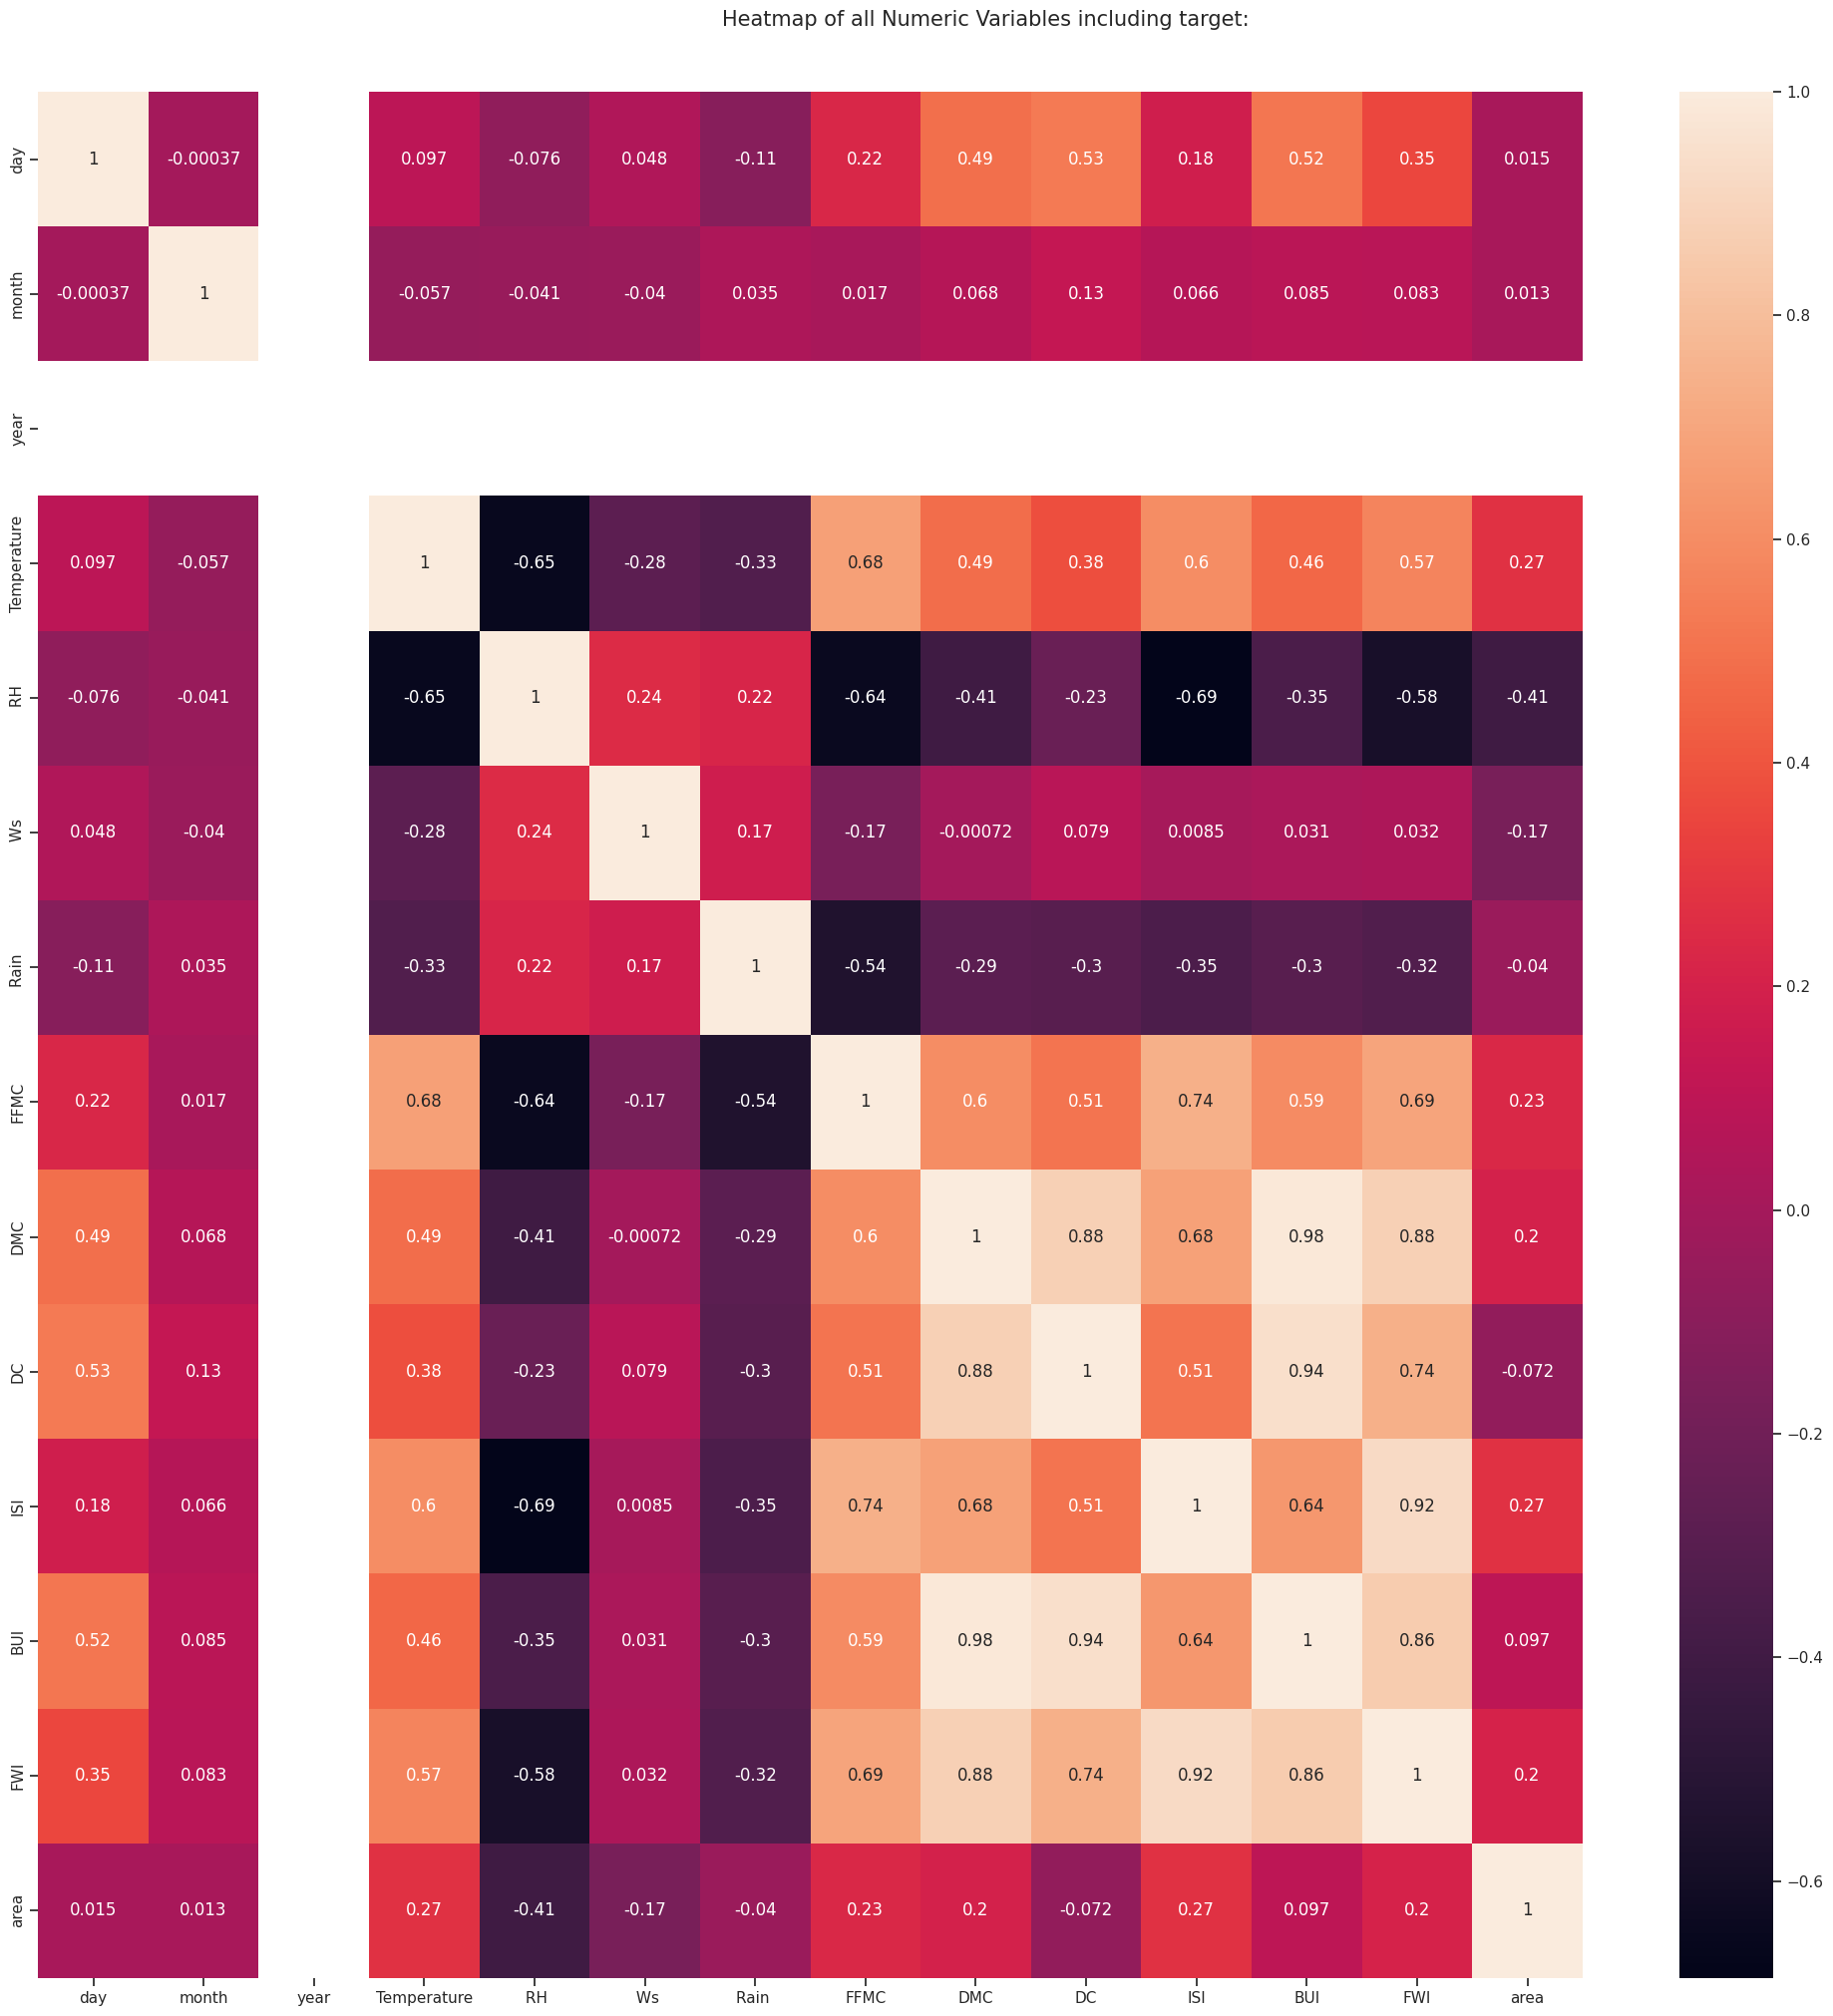

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 44 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


day  month   year   Temperature    RH    Ws  Rain   FFMC   DMC   DC    \
0     1.0   6.0   2012.0     29.0      57.0  18.0   0.0   65.7   3.4    7.6   
1     2.0   6.0   2012.0     29.0      61.0  13.0   1.3   64.4   4.1    7.6   
2     3.0   6.0   2012.0     26.0      82.0  22.0  13.1   47.1   2.5    7.1   
3     4.0   6.0   2012.0     25.0      89.0  13.0   2.5   28.6   1.3    6.9   
4     5.0   6.0   2012.0     27.0      77.0  16.0   0.0   64.8   3.0   14.2   
5     6.0   6.0   2012.0     31.0      67.0  14.0   0.0   82.6   5.8   22.2   
6     7.0   6.0   2012.0     33.0      54.0  13.0   0.0   88.2   9.9   30.5   
7     8.0   6.0   2012.0     30.0      73.0  15.0   0.0   86.6  12.1   38.3   
8     9.0   6.0   2012.0     25.0      88.0  13.0   0.2   52.9   7.9   38.8   
9    10.0   6.0   2012.0     28.0      79.0  12.0   0.0   73.2   9.5   46.3   
10   11.0   6.0   2012.0     31.0      65.0  14.0   0.0   84.5  12.5   54.3   
11   12.0   6.0   2012.0     26.0      81.0  19.0   0.0   84.0  13.8   61.4   
12   13.0   6.0   2012.0     27.0      84.0  21.0   1.2   50.0   6.7   17.0   
13   14.0   6.0   2012.0     30.0      78.0  20.0   0.5   59.0   4.6    7.8   
14   15.0   6.0   2012.0     28.0      80.0  17.0   3.1   49.4   3.0    7.4   
15   16.0   6.0   2012.0     29.0      89.0  13.0   0.7   36.1   1.7    7.6   
16   17.0   6.0   2012.0     30.0      89.0  16.0   0.6   37.3   1.1    7.8   
17   18.0   6.0   2012.0     31.0      78.0  14.0   0.3   56.9   1.9    8.0   
18   19.0   6.0   2012.0     31.0      55.0  16.0   0.1   79.9   4.5   16.0   
19   20.0   6.0   2012.0     30.0      80.0  16.0   0.4   59.8   3.4   27.1   
20   21.0   6.0   2012.0     30.0      78.0  14.0   0.0   81.0   6.3   31.6   
21   22.0   6.0   2012.0     31.0      67.0  17.0   0.1   79.1   7.0   39.5   
22   23.0   6.0   2012.0     32.0      62.0  18.0   0.1   81.4   8.2   47.7   
23   24.0   6.0   2012.0     32.0      66.0  17.0   0.0   85.9  11.2   55.8   
24   25.0   6.0   2012.0     31.0      64.0  15.0   0.0   86.7  14.2   63.8   
25   26.0   6.0   2012.0     31.0      64.0  18.0   0.0   86.8  17.8   71.8   
26   27.0   6.0   2012.0     34.0      53.0  18.0   0.0   89.0  21.6   80.3   
27   28.0   6.0   2012.0     32.0      55.0  14.0   0.0   89.1  25.5   88.5   
28   29.0   6.0   2012.0     32.0      47.0  13.0   0.3   79.9  18.4   84.4   
29   30.0   6.0   2012.0     33.0      50.0  14.0   0.0   88.7  22.9   92.8   
30    1.0   7.0   2012.0     29.0      68.0  19.0   1.0   59.9   2.5    8.6   
31    2.0   7.0   2012.0     27.0      75.0  19.0   1.2   55.7   2.4    8.3   
32    3.0   7.0   2012.0     32.0      76.0  20.0   0.7   63.1   2.6    9.2   
33    4.0   7.0   2012.0     33.0      78.0  17.0   0.0   80.1   4.6   18.5   
34    5.0   7.0   2012.0     33.0      66.0  14.0   0.0   85.9   7.6   27.9   
35    6.0   7.0   2012.0     32.0      63.0  14.0   0.0   87.0  10.9   37.0   
36    7.0   7.0   2012.0     35.0      64.0  18.0   0.2   80.0   9.7   40.4   
37    8.0   7.0   2012.0     33.0      68.0  19.0   0.0   85.6  12.5   49.8   
38    9.0   7.0   2012.0     32.0      68.0  14.0   1.4   66.6   7.7    9.2   
39   10.0   7.0   2012.0     33.0      69.0  13.0   0.7   66.6   6.0    9.3   
40   11.0   7.0   2012.0     33.0      76.0  14.0   0.0   81.1   8.1   18.7   
41   12.0   7.0   2012.0     31.0      75.0  13.0   0.1   75.1   7.9   27.7   
42   13.0   7.0   2012.0     34.0      81.0  15.0   0.0   81.8   9.7   37.2   
43   14.0   7.0   2012.0     34.0      61.0  13.0   0.6   73.9   7.8   22.9   
44   15.0   7.0   2012.0     30.0      80.0  19.0   0.4   60.7   5.2   17.0   
45   16.0   7.0   2012.0     28.0      76.0  21.0   0.0   72.6   7.0   25.5   
46   17.0   7.0   2012.0     29.0      70.0  14.0   0.0   82.8   9.4   34.1   
47   18.0   7.0   2012.0     31.0      68.0  14.0   0.0   85.4  12.1   43.1   
48   19.0   7.0   2012.0     35.0      59.0  17.0   0.0   88.1  12.0   52.8   
49   20.0   7.0   2012.0     33.0      65.0  15.0   0.1 

In [108]:
AV.AutoViz(df_up_num)